# Tarea 4 Agrupamiento
## Crea un modelo de agrupamiento con k-means para tu modelo de clasificacion y comparalo con tu modelo de clasificacion.90 con k = numero de classes100 usas elbow metod para encontrar el valor de k
### El dataset Escogido para la realización de esta practica es el dataset de enfermedades del corazón de el repositorio de UCI. 

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
heart_disease = fetch_ucirepo(id=45) 
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [4]:
# Obtenemos los datos del repositorio.
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [5]:
# Dividir el DataFrame en características (X) y variable objetivo (y)
X = X[['sex', 'cp', 'fbs', 'exang']] 


In [6]:
 # Eliminamos filas con valores faltantes
data = pd.concat([X, y], axis=1)  # Unimos X e y para eliminar filas faltantes
data = data.dropna()  # Eliminamos filas con valores faltantes

# Separamos X e y nuevamente
X = data.drop(columns=["num"])
y = data["num"]

In [7]:
X = pd.get_dummies(X, drop_first=True)


In [8]:
print(y)

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64


In [9]:
print(X)

     sex  cp  fbs  exang
0      1   1    1      0
1      1   4    0      1
2      1   4    0      1
3      1   3    0      0
4      0   2    0      0
..   ...  ..  ...    ...
298    1   1    0      0
299    1   4    1      0
300    1   4    0      1
301    0   2    0      0
302    1   3    0      0

[303 rows x 4 columns]


In [10]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Definir el rango de posibles valores de k
k_range = range(1, 11)  # Probar valores de k de 1 a 10
sse = []


In [13]:
# Calcular SSE para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)  # SSE para el k actual

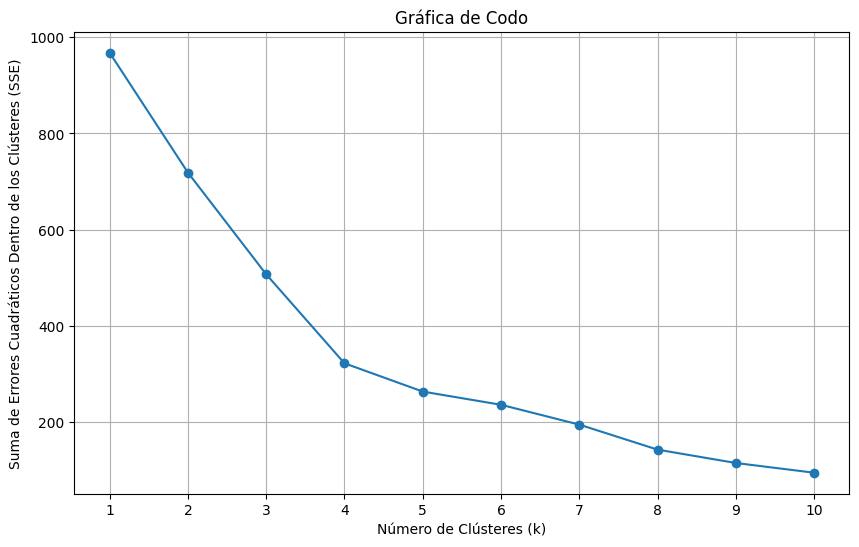

In [14]:
# Crear la gráfica de codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Gráfica de Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Suma de Errores Cuadráticos Dentro de los Clústeres (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#### Con esta grafica podemos ver que la SSE disminuye cerca del 4. Por lo tanto el numero optimo de clusters es 4

In [15]:
# Aplicar K-Means con el número de clases como valor inicial de k
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_train = kmeans.fit_predict(X_train_scaled)
clusters_test = kmeans.predict(X_test_scaled)


In [16]:
# Comparar los clústeres con las etiquetas verdaderas
from sklearn.metrics import confusion_matrix

In [17]:
# Crear una matriz de contingencia para el conjunto de prueba
contingency_matrix = pd.crosstab(y_test, clusters_test)
print('Matriz de Contingencia (Test):')
print(contingency_matrix)

Matriz de Contingencia (Test):
col_0   0  1  2  3
num               
0      15  8  1  5
1       5  1  3  3
2       3  0  4  2
3       3  0  3  1
4       2  0  1  1


In [18]:
# Calcular la pureza
total_points = np.sum(contingency_matrix.values)
pureza = np.sum(np.amax(contingency_matrix.values, axis=1)) / total_points
print('Pureza (Precisión):', pureza)

Pureza (Precisión): 0.47540983606557374


### Podemos ver que este modelo cuenta con una precisión del .47540983, Una precisión menor que la que tenia el modelo de Agrupamiento.